# Insurance Claims- Fraud Detection

Data Description.

Importing Required Libraries. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the Data Set

In [3]:
df=pd.read_csv('insurance_fraud.csv')

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.shape     #checking data dimensions.

(1000, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [9]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
10-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
22-02-2015    20
06-02-2015    20
31-01-2015    20
12-02-2015    20
12-01-2015    19
14-01-2015    19
21-02-2015    19
23-02-2015    19
21-01-2015    19
01-01-2015    19
25-02-2015    18
28-02-2015    18
20-01-2015    18
01-02-2015    18
03-01-2015    18
14-02-2015    18
18-01-2015    18
26-02-2015    17
06-01-2015    17
08-02-2015    17
24-02-2015    17
09-01-2015    17
16-01-2015    16
16-02-2015    16
15-02-2015    16
13-02-2015    16
05-02-2015    16
17-01-2015    15
15-01-2015    15
18-02-2015    15
28-01-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
03-02-2015    13
23-01-2015    13
27-01-2015    13
09-02-2015    13
01-03-2015    12
04-01-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
10-02-2015    10
25-01-2015    10
11-02-2015    10
07-02-2015    10
19-02-2015    10
11-01-2015    

In [10]:
df['policy_bind_date'].value_counts()

28-04-1992    3
01-01-2006    3
05-08-1992    3
07-12-1995    2
21-12-2002    2
             ..
05-11-2000    1
25-11-1994    1
09-07-2001    1
08-02-1990    1
10-12-2014    1
Name: policy_bind_date, Length: 951, dtype: int64

In [11]:
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]
df['policy_bind_Year']=df['policy_bind_Year'].astype(int)

In [12]:
df['policy_bind_Year'].unique()

array([2014, 2006, 2000, 1990, 1997, 2011, 2002, 1999, 2012, 1998, 1992,
       2005, 2004, 1994, 1991, 1996, 2013, 2008, 2003, 2010, 1993, 1995,
       2007, 2001, 2009, 2015])

checking null values

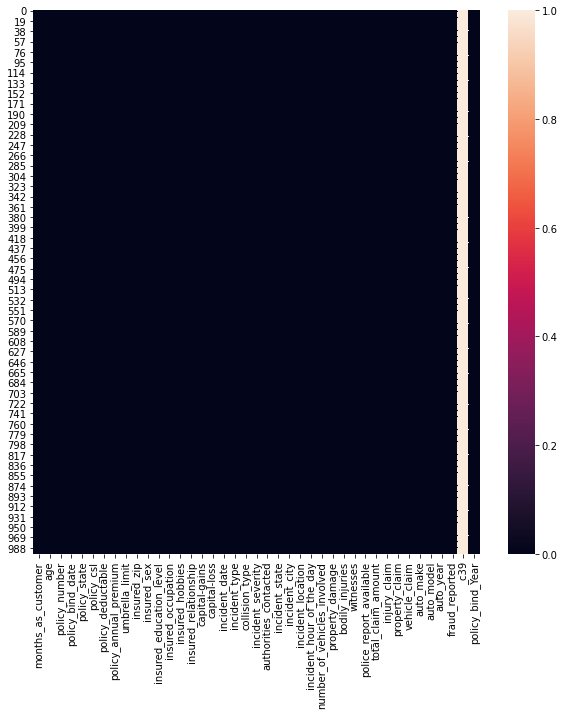

In [13]:
plt.figure(figsize=(10,10))

sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
pd.set_option('display.max_rows',None) #this will show all rows

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39,policy_bind_Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN,2001.604000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN,7.360391
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN,1990.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN,1995.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN,2002.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN,2008.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN,2015.000000


Analysis. 

In [17]:
k=['policy_state','policy_csl', 'insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship','incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city',
'property_damage','police_report_available',  'auto_make','auto_model', 'policy_bind_Year']

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


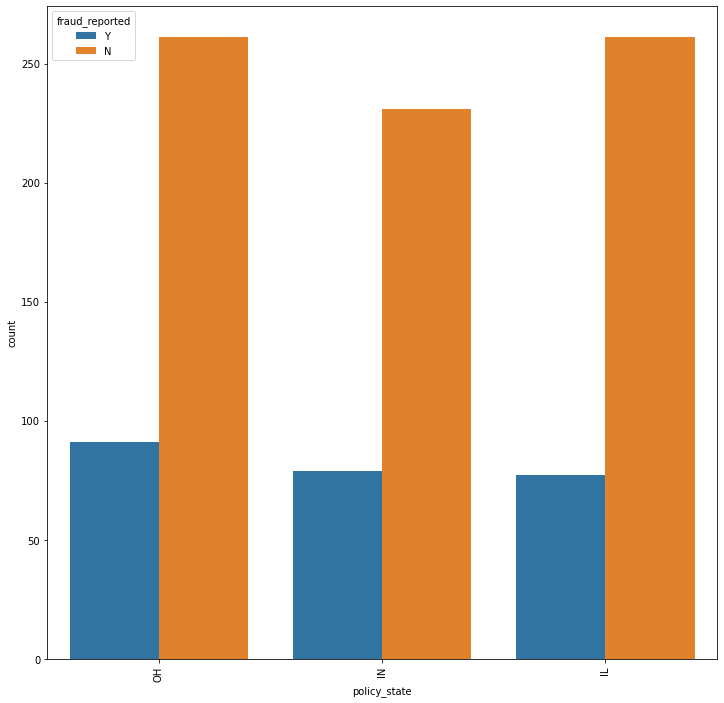

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


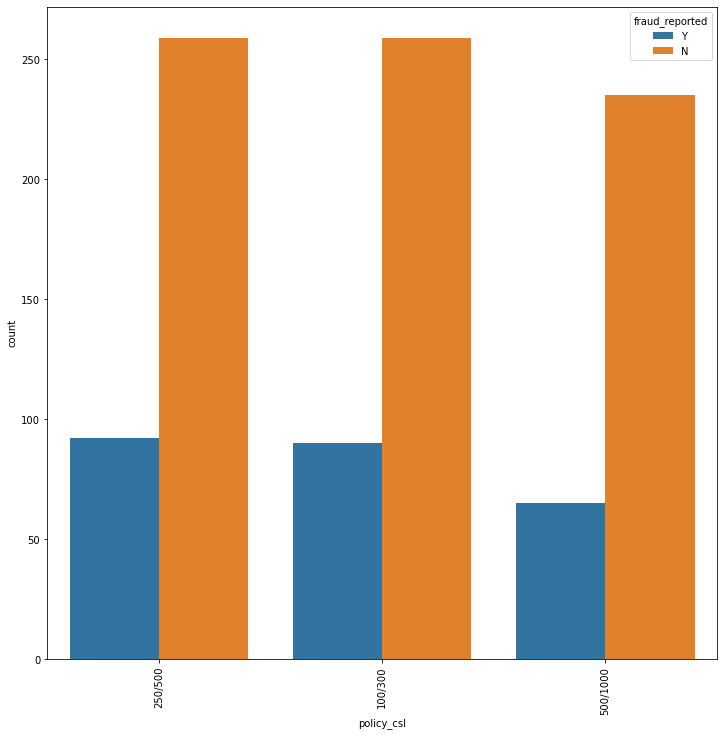

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


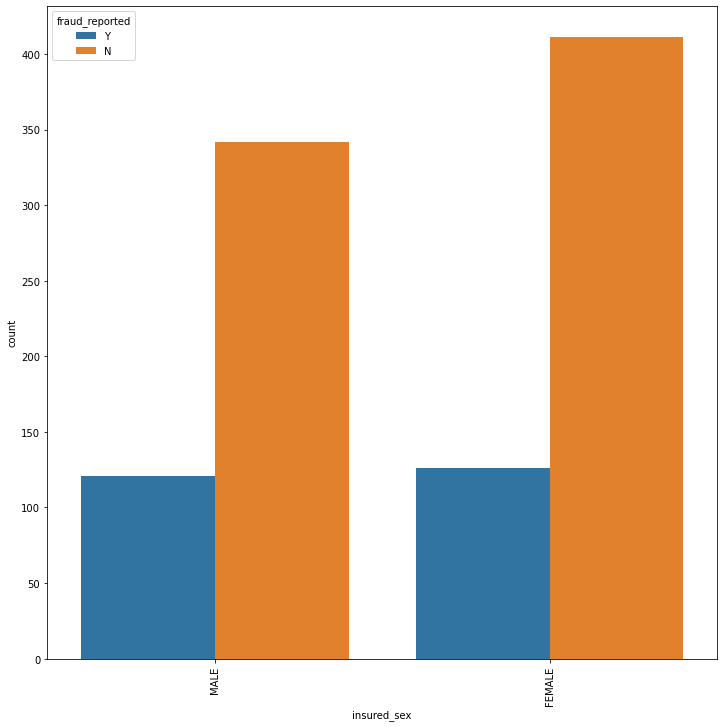

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


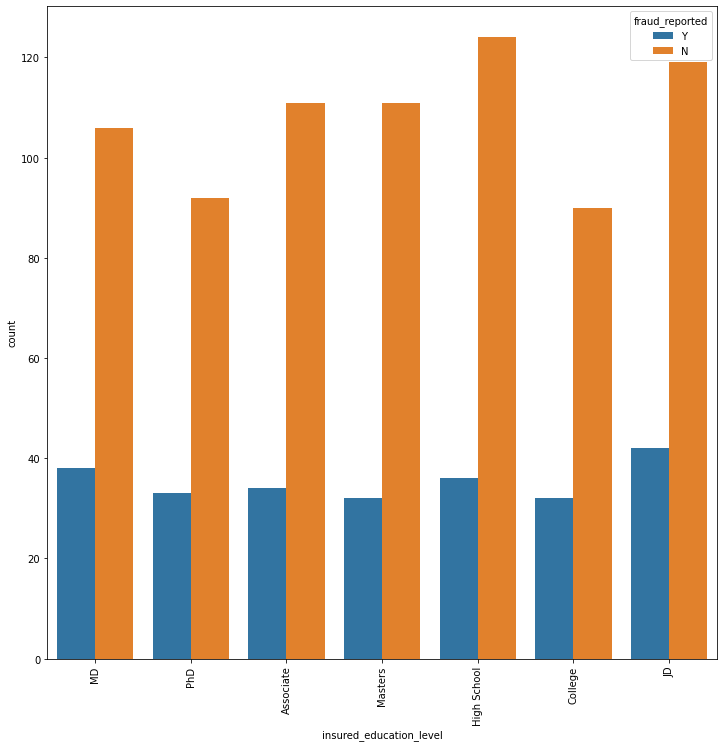

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


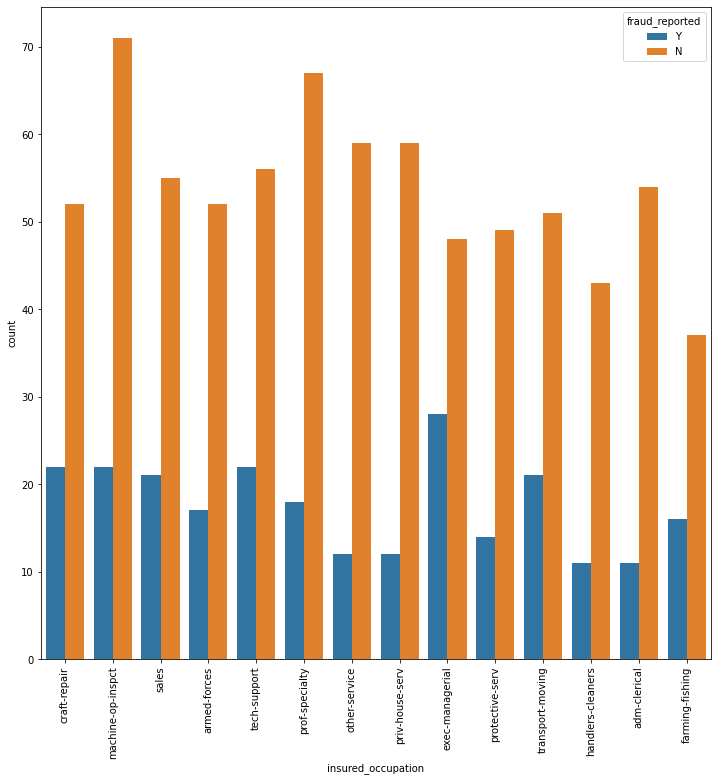

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


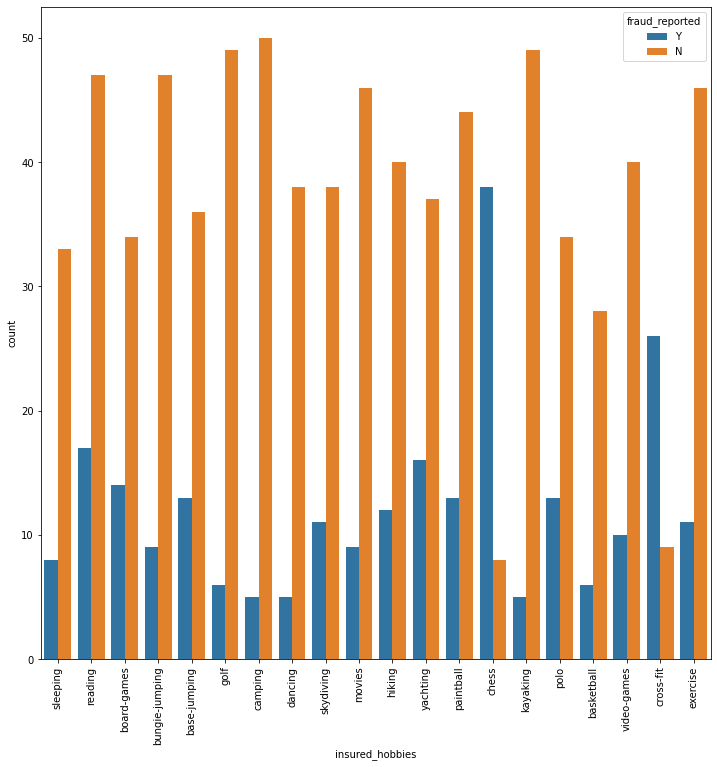

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


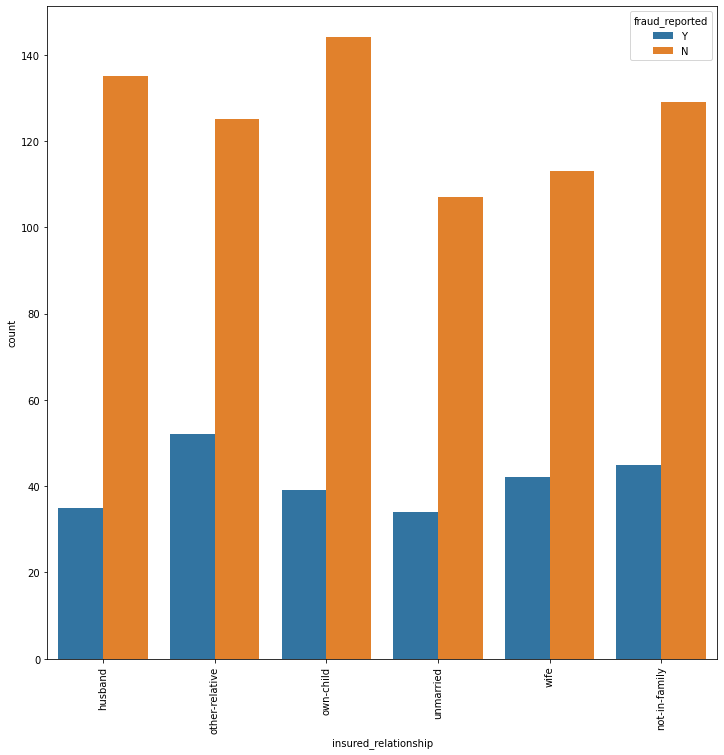

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


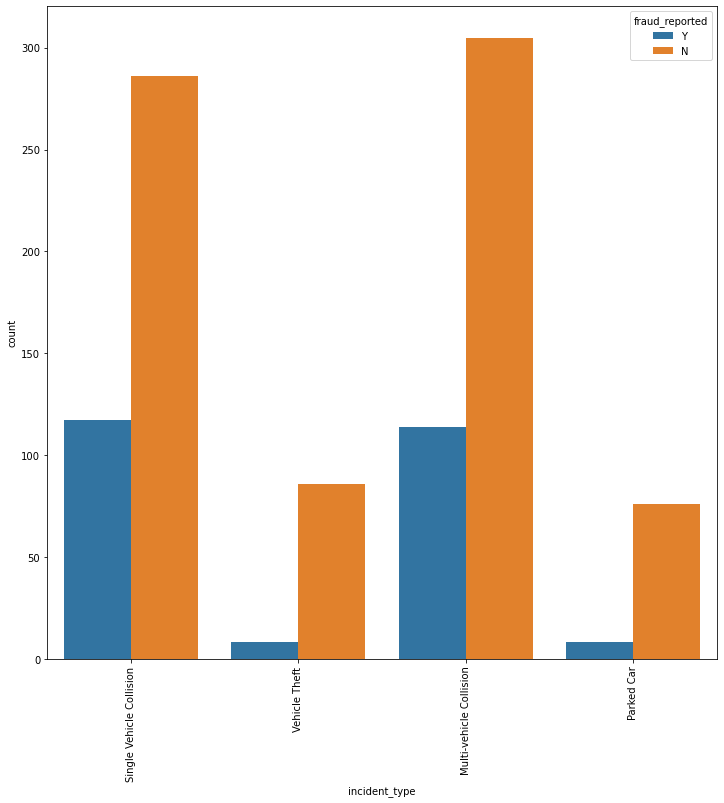

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


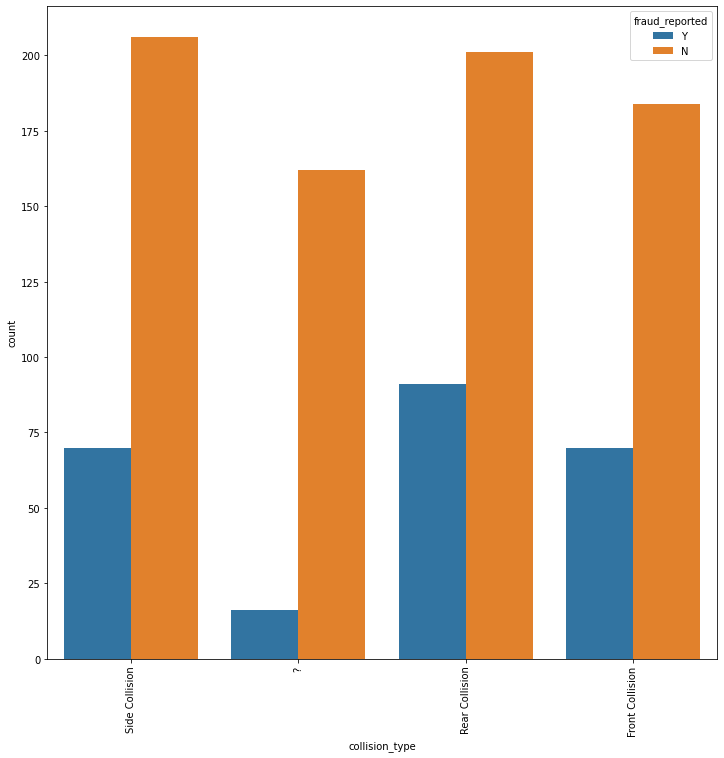

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


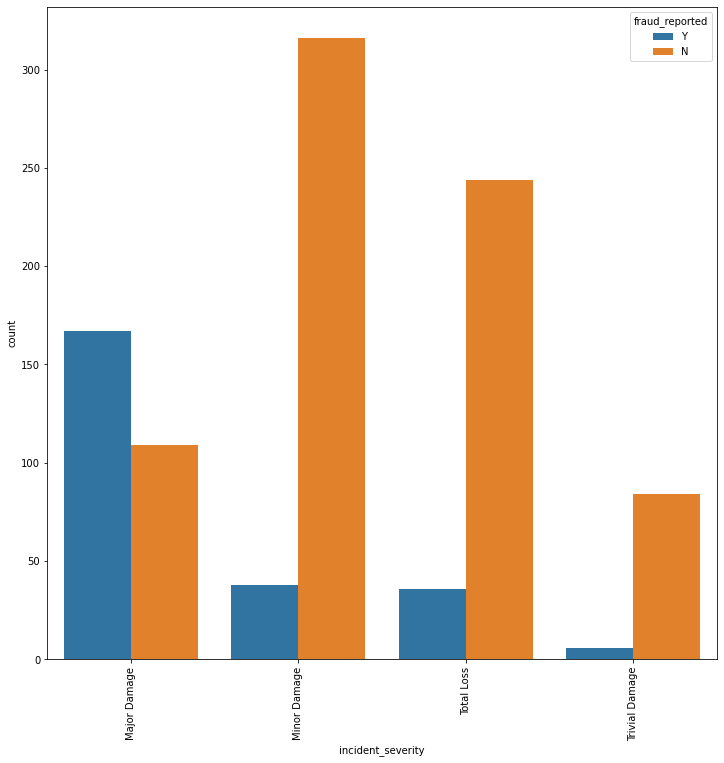

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


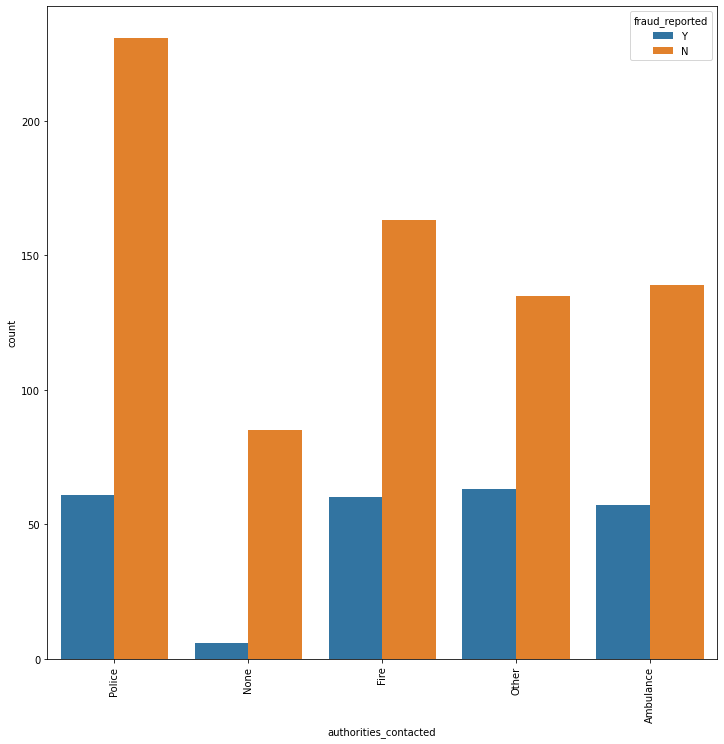

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


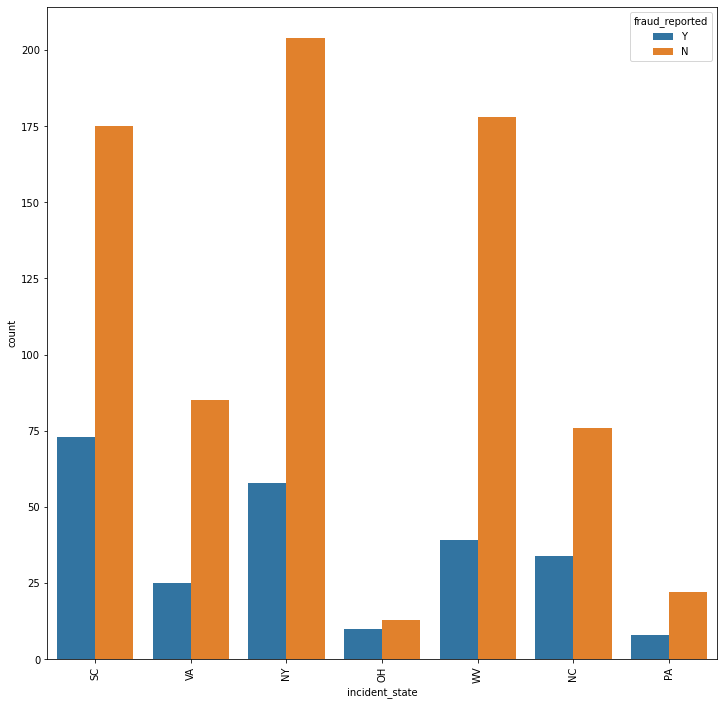

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


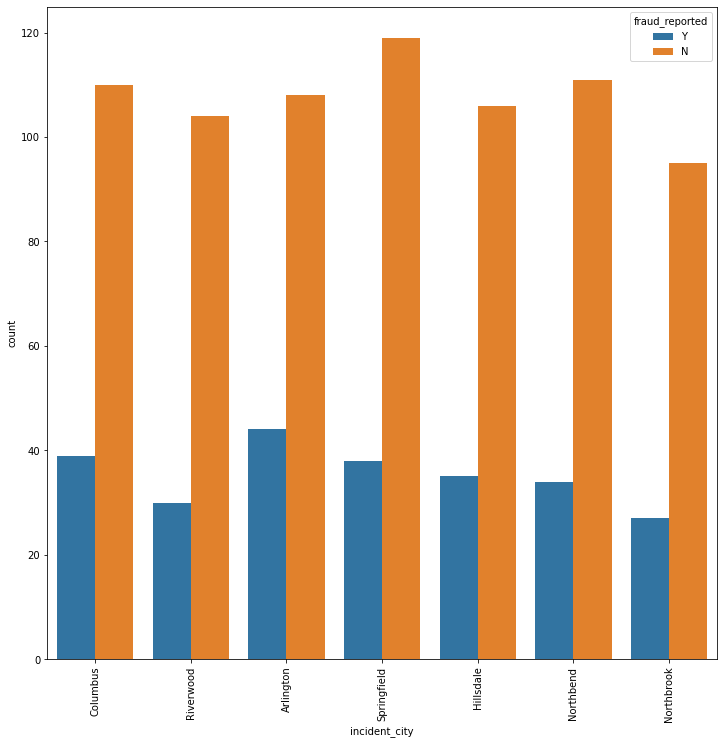

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


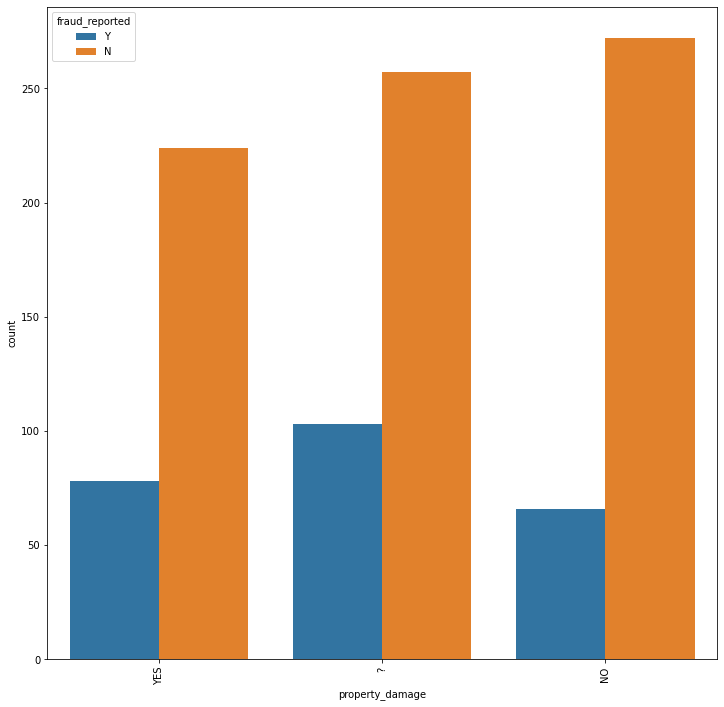

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


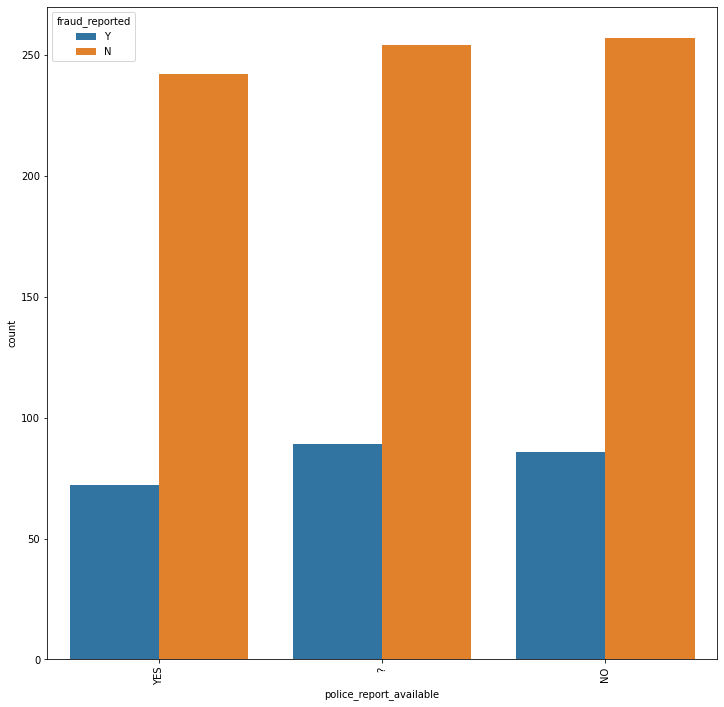

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


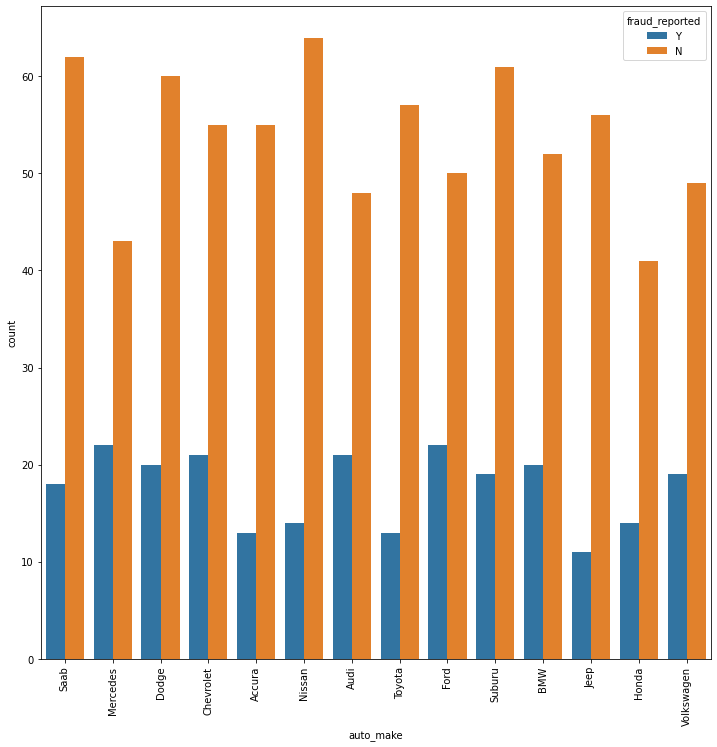

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
E400              27
F150              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Silverado         22
Civic             22
Fusion            21
Impreza           20
TL                20
Corolla           20
CRV               20
ML350             20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


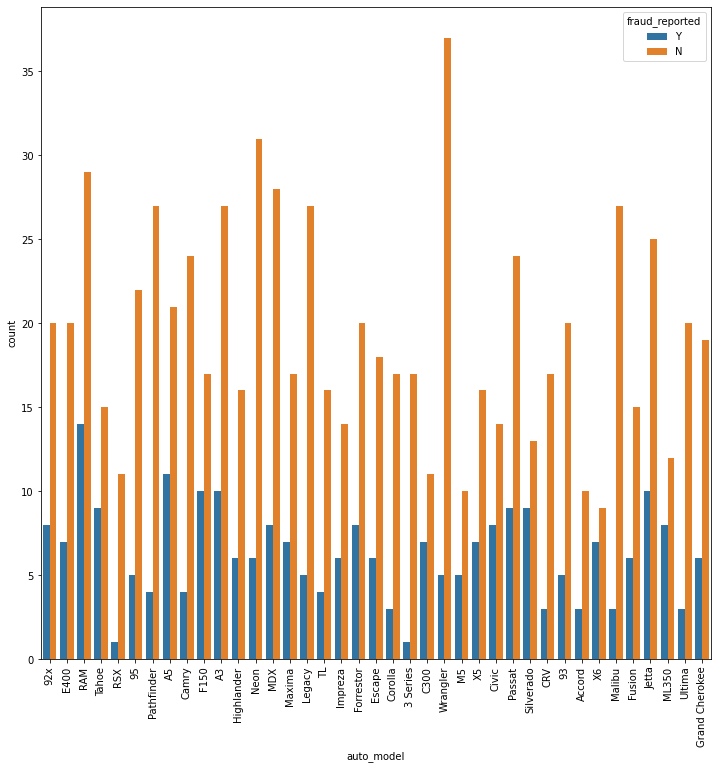

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
1994    41
2006    41
2001    41
2007    40
2005    40
1999    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
1993    33
2008    33
2011    32
2000    31
1998    30
2015     3
Name: policy_bind_Year, dtype: int64


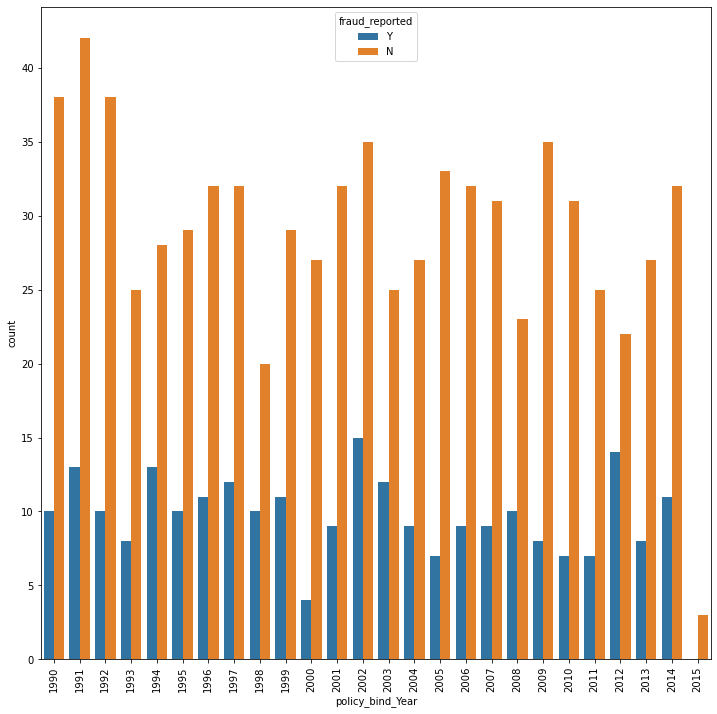

In [18]:
for m in k:
    plt.figure(figsize=(12,12))
    sns.countplot(x=m,hue='fraud_reported',data=df)
    print(df[m].value_counts())
    plt.xticks(rotation=90)
    plt.show()

numerical columns:

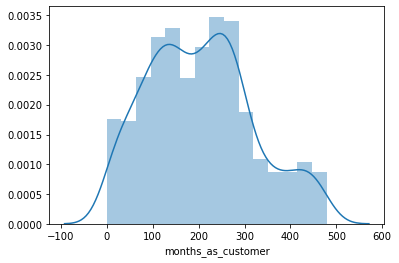

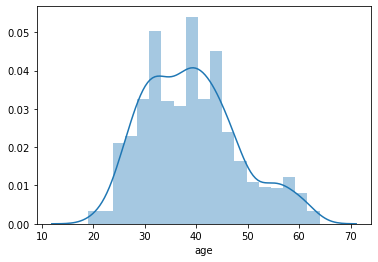

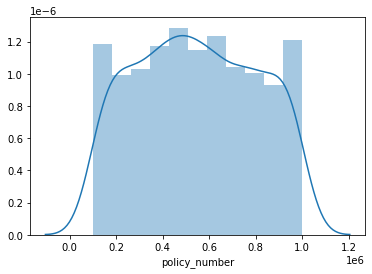

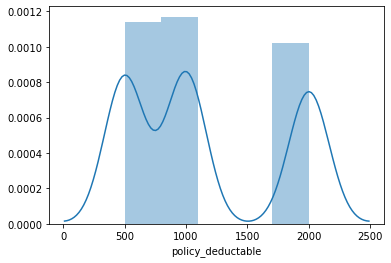

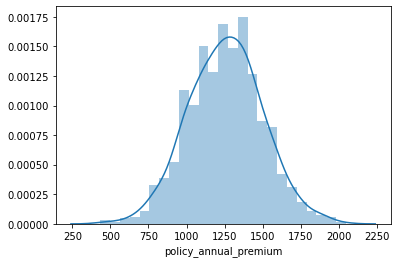

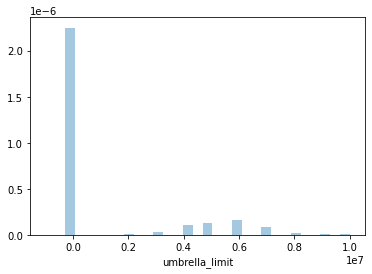

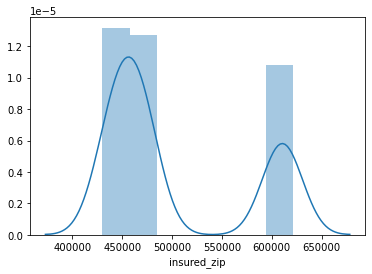

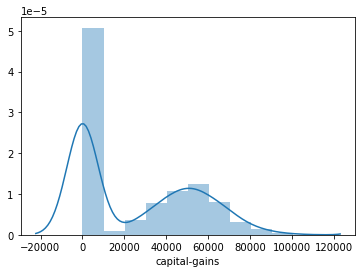

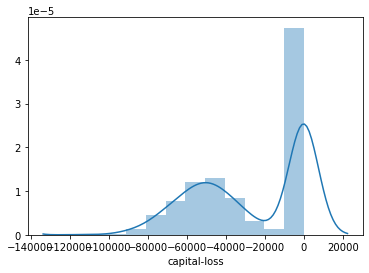

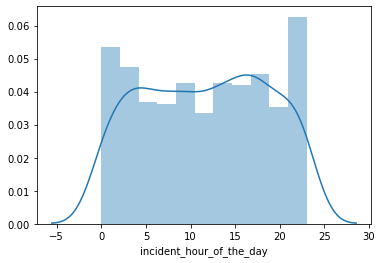

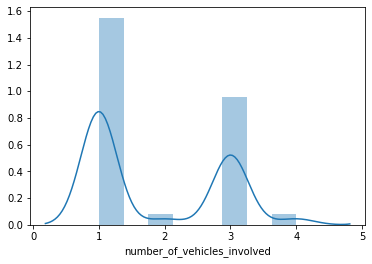

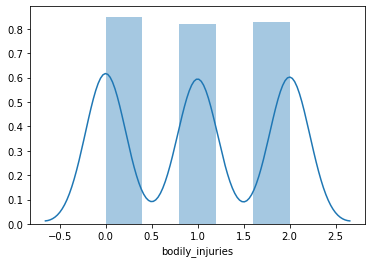

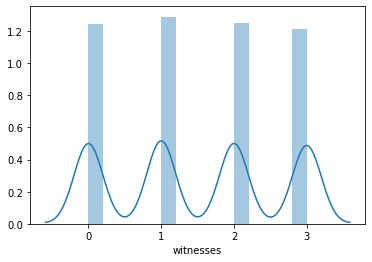

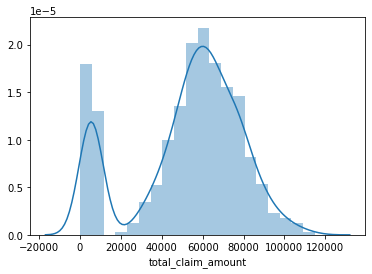

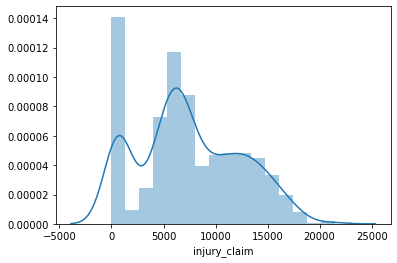

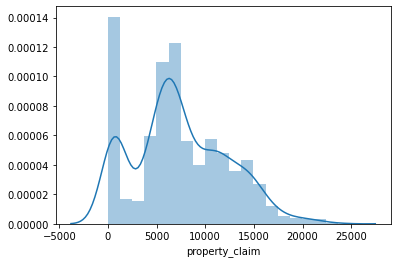

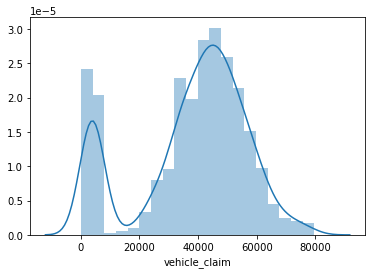

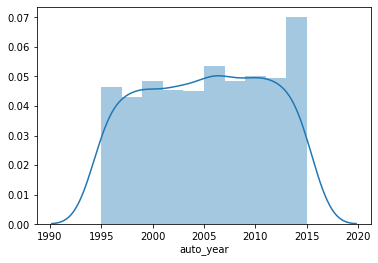

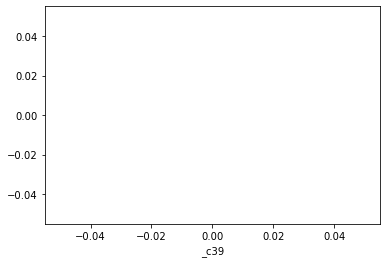

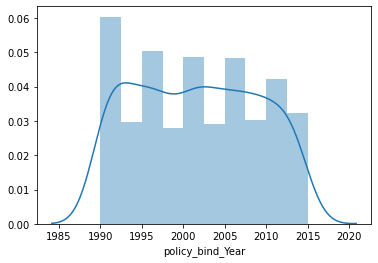

In [19]:
for m in df.describe().columns:
    sns.distplot(df[m].dropna())
    plt.show()
    

In [20]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
policy_bind_Year               0.052511
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform

In [22]:
df['umbrella_limit']=power_transform(df['umbrella_limit'].values.reshape(-1,1))

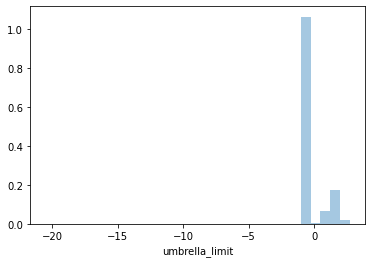

In [23]:
sns.distplot(df['umbrella_limit'])

In [24]:
df['umbrella_limit']=power_transform(df['umbrella_limit'].values.reshape(-1,1))

In [25]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                -1.780083
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
policy_bind_Year               0.052511
dtype: float64

In [26]:
df['umbrella_limit']=power_transform(df['umbrella_limit'].values.reshape(-1,1))

In [27]:
df['umbrella_limit'].skew()

-2.45763937616101

In [28]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39',
       'policy_bind_Year'],
      dtype='object')

In [29]:
df['collision_type']=df['collision_type'].replace('?','unknown_type')
df['property_damage']=df['property_damage'].replace('?','unknown_damage')
df['police_report_available']=df['police_report_available'].replace('?','Not_available')

As we discussed to remove the columns Policy_number, insured_zip, _c39. We will remove these columns now.  

In [30]:
df.drop(['policy_number','policy_bind_date','insured_zip'],axis=1,inplace=True)

In [31]:
pd.set_option('display.max_rows',None)

In [32]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,-0.406805,MALE,MD,craft-repair,...,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,2014
1,228,42,IN,250/500,2000,1197.22,1.524914,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,2006
2,134,29,OH,100/300,2000,1413.14,1.524914,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,2000
3,256,41,IL,250/500,2000,1415.74,1.877713,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1990
4,228,44,IL,500/1000,1000,1583.91,1.877713,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,2009,N,NaN,2014


Dealing with categorical variables.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
df['policy_state']=le.fit_transform(df['policy_state'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['property_damage']=le.fit_transform(df['property_damage'])


Dealing Numerical data.

In [36]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [37]:
df['ploicy_person']=df['policy_csl'].str.split('/').str[0]
df['ploicy_accident']=df['policy_csl'].str.split('/').str[1]
df.drop('policy_csl',axis=1,inplace=True)

In [38]:
df['incident_month']=df['incident_date'].str.split('-').str[1]
df.drop('incident_date',axis=1,inplace=True)

In [39]:
df.drop('incident_location',axis=1,inplace=True)

scaling

In [40]:
x=df.drop(['_c39','fraud_reported'],axis=1)
y=df['fraud_reported']

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc=StandardScaler()

In [43]:
x1=sc.fit_transform(x)

In [44]:
x1=pd.DataFrame(x1,columns=x.columns)

In [45]:
x1.head(2)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Year,ploicy_person,ploicy_accident,incident_month
0,1.078140,0.990836,1.187173,-0.222383,0.616705,-0.406805,1.076953,0.530931,-1.158316,1.281737,...,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440,1.684992,-0.140228,-0.279173,-0.947587
1,0.208995,0.334073,-0.016856,1.412784,-0.242521,1.524914,1.076953,0.530931,-0.162558,0.929078,...,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491,0.597550,-0.140228,-0.279173,-0.947587


In [46]:
x=x1

In [47]:
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Year,ploicy_person,ploicy_accident,incident_month
0,1.078140,0.990836,1.187173,-0.222383,0.616705,-0.406805,1.076953,0.530931,-1.158316,1.281737,...,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440,1.684992,-0.140228,-0.279173,-0.947587
1,0.208995,0.334073,-0.016856,1.412784,-0.242521,1.524914,1.076953,0.530931,-0.162558,0.929078,...,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491,0.597550,-0.140228,-0.279173,-0.947587
2,-0.608002,-1.088913,1.187173,1.412784,0.642233,1.524914,-0.928546,1.557877,1.082141,-1.363201,...,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491,-0.218032,-1.068892,-0.975366,0.962871
3,0.452355,0.224613,-1.220886,1.412784,0.652886,1.877713,-0.928546,1.557877,-1.407256,-1.363201,...,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664,-1.577335,-0.140228,-0.279173,-0.947587
4,0.208995,0.552994,-1.220886,-0.222383,1.341980,1.877713,1.076953,-1.522961,1.082141,-1.363201,...,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112,1.684992,1.407545,1.461308,0.962871


Applying Machine Learning classification models.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [50]:
lr=LogisticRegression()
dr=DecisionTreeClassifier()
svc=SVC()
rf=RandomForestClassifier()

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [53]:
model=[lr,dr,svc,rf]

In [54]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.7666666666666667
[[201  15]
 [ 55  29]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       216
           1       0.66      0.35      0.45        84

    accuracy                           0.77       300
   macro avg       0.72      0.64      0.65       300
weighted avg       0.75      0.77      0.74       300



accuracy score of DecisionTreeClassifier() is:
0.71
[[178  38]
 [ 49  35]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       216
           1       0.48      0.42      0.45        84

    accuracy                           0.71       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.70      0.71      0.70       300



accuracy score of SVC() is:
0.7233333333333334
[[216   0]
 [ 83   1]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       216
   

Cross validation

In [55]:
from sklearn.model_selection import cross_val_score
Lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

cross validation of LogisticRegression: 0.78


In [56]:
from sklearn.model_selection import cross_val_score
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecsisionTreeClassifier:',drs.mean())

cross validation of DecsisionTreeClassifier: 0.773


In [57]:
from sklearn.model_selection import cross_val_score
raf=cross_val_score(rf,x,y,cv=5)
print('cross validation of RandomForestClassifier:',raf.mean())

cross validation of RandomForestClassifier: 0.772


In [58]:
srs=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVC:',srs.mean())

cross validation of SVC: 0.744


We see that random forest classifier is performing good. We will do hyperparameter tunning.

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'gini'}


In [61]:
gd_pred=gd.best_estimator_.predict(x_test)

In [62]:
accuracy_score(y_test,gd_pred)

1.0

In [63]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[216   0]
 [  0  84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00        84

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Saving the Model

In [64]:
import joblib
joblib.dump(gd.best_estimator_,'insurance_fraud.obj')

['insurance_fraud.obj']